In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import numpy as np
import lineagevi
from lineagevi.utils import *
import torch

In [3]:
#adata = sc.read_h5ad('/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.08.17_12.43.17/adata_with_velocity.h5ad')
adata = sc.read_h5ad('/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.08.24_12.36.47/adata_with_velocity.h5ad')

In [4]:
adata.layers['velocity'] *=-1
adata.obsm['velocity_gp'] *=-1

computing velocity graph (using 1/10 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


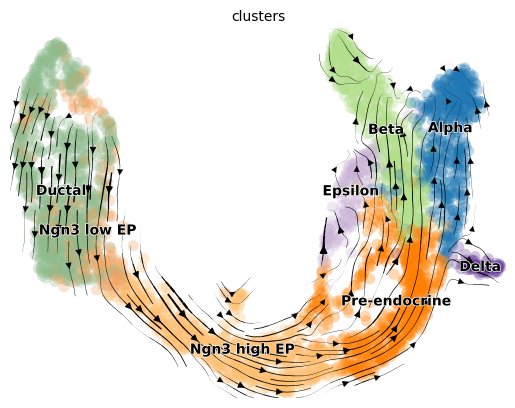

In [5]:
sc.pp.neighbors(adata)
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color='clusters')

computing velocity graph (using 1/10 cores)
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


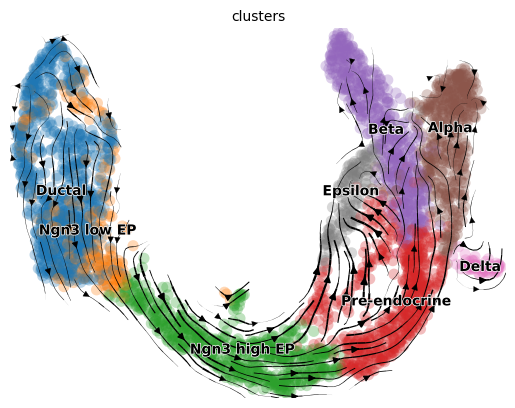

In [6]:
adata_gp = sc.AnnData(X=adata.obsm['z'])

adata_gp.obs = adata.obs.copy()
adata_gp.var_names = adata.uns['terms']
adata_gp.layers['velocity'] = adata.obsm['velocity_gp']
adata_gp.layers['spliced'] = adata.obsm['z']
adata_gp.obsm['X_umap'] = adata.obsm['X_umap']

sc.pp.neighbors(adata_gp)
scv.tl.velocity_graph(adata_gp)
scv.pl.velocity_embedding_stream(adata_gp, color='clusters')

computing velocity graph (using 1/10 cores)
    finished (0:00:01) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


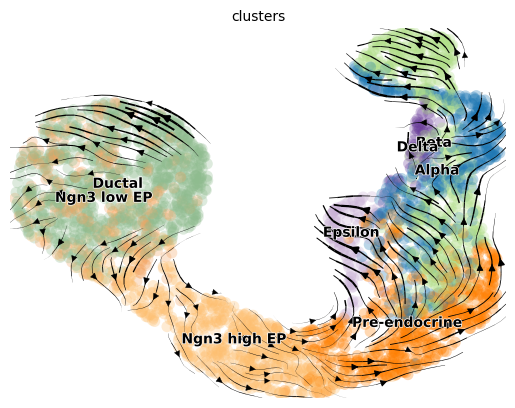

In [7]:
sc.pp.neighbors(adata, use_rep='z')
sc.tl.umap(adata)
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color='clusters')

computing velocity graph (using 1/10 cores)
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


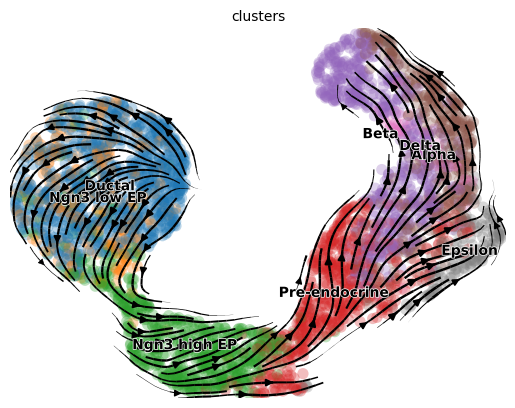

In [8]:
sc.pp.neighbors(adata_gp)
sc.tl.umap(adata_gp)
scv.tl.velocity_graph(adata_gp)
scv.pl.velocity_embedding_stream(adata_gp, color='clusters')